# Assignment 1 DD2358
 Group 17: Felix Schätzle, Georgios Mitsos, Thorben Fetz

## Task 1.1 Calculate the Clock Granularity of different Python Timers

In [1]:
import numpy as np
import time
import timeit
import psutil

In [2]:
#time.time()

def checktick():
    M = 200
    timesfound = np.empty((M,))
    for i in range(M):
        t1 =  time.time() # get timestamp from timer
        t2 = time.time() # get timestamp from timer
        while (t2 - t1) < 1e-16: # if zero then we are below clock granularity, retake timing
            t2 = time.time() # get timestamp from timer
        t1 = t2 # this is outside the loop
        timesfound[i] = t1 # record the time stamp
    minDelta = 1000000
    Delta = np.diff(timesfound) # it should be cast to int only when needed
    minDelta = Delta.min()
    return minDelta

print(f"Granularity for time.time(): {checktick():.2E} seconds")

Granularity for time.time(): 7.15E-07 seconds


In [3]:
#time.time_ns()

def checktick():
    M = 200
    timesfound = np.empty((M,))
    for i in range(M):
        t1 =  time.time_ns() # get timestamp from timer
        t2 = time.time_ns() # get timestamp from timer
        while (t2 - t1) < 1e-16: # if zero then we are below clock granularity, retake timing
            t2 = time.time_ns() # get timestamp from timer
        t1 = t2 # this is outside the loop
        timesfound[i] = t1 # record the time stamp
    minDelta = 1000000
    Delta = np.diff(timesfound) # it should be cast to int only when needed
    minDelta = Delta.min()
    return minDelta/1e9

print(f"Granularity for time.time_ns(): {checktick():.2E} seconds")

Granularity for time.time_ns(): 7.68E-07 seconds


In [4]:
# timeit.timeit()

def checktick():
    t1 = time.time()
    t2 = time.time()
    while (t2 - t1) < 1e-16:  # if zero then we are below clock granularity, retake timing
        t2 = time.time()

# Measure the time taken by the function using timeit
execution_time = timeit.timeit("checktick()", globals=globals(), number=200)
print(f"Execution time for time.timeit(): {execution_time:.2E} seconds")

Execution time for time.timeit(): 2.04E-04 seconds


## Task 1.2 Timing the Julia set code functions

Due to lack of computing power on our laptop, we run the function with the following arguments: 
calc_pure_python(desired_width=1000, max_iterations=300) 

Using this decorator:

In [26]:
def timefn(fn):
    @wraps(fn)
    def measure_time(*args, **kwargs):
        t1 = time.time()
        result = fn(*args, **kwargs)
        t2 = time.time()
        print(f"@timefn: {fn.__name__} took {t2 - t1} seconds")
        return result
    return measure_time

In [21]:
"""Julia set generator without optional PIL-based image drawing"""
import time
from functools import wraps

# area of complex space to investigate
x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
c_real, c_imag = -0.62772, -.42193



@timefn
def calc_pure_python(desired_width, max_iterations, verbose=True):
    """Create a list of complex coordinates (zs) and complex parameters (cs),
    build Julia set"""
    x_step = (x2 - x1) / desired_width
    y_step = (y1 - y2) / desired_width
    x = []
    y = []
    ycoord = y2
    while ycoord > y1:
        y.append(ycoord)
        ycoord += y_step
    xcoord = x1
    while xcoord < x2:
        x.append(xcoord)
        xcoord += x_step
    # build a list of coordinates and the initial condition for each cell.
    # Note that our initial condition is a constant and could easily be removed,
    # we use it to simulate a real-world scenario with several inputs to our
    # function
    zs = []
    cs = []
    for ycoord in y:
        for xcoord in x:
            zs.append(complex(xcoord, ycoord))
            cs.append(complex(c_real, c_imag))

    if(verbose): print("Length of x:", len(x))
    if(verbose): print("Total elements:", len(zs))
    start_time = time.time()
    output = calculate_z_serial_purepython(max_iterations, zs, cs)
    end_time = time.time()
    secs = end_time - start_time
    if(verbose): print(calculate_z_serial_purepython.__name__ + " took", secs, "seconds")

    # This sum is expected for a 1000^2 grid with 300 iterations
    # It ensures that our code evolves exactly as we'd intended
    # assert sum(output) == 33219980

@timefn
def calculate_z_serial_purepython(maxiter, zs, cs):
    """Calculate output list using Julia update rule"""
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
    return output


# Calculate the Julia set using a pure Python solution with
# reasonable defaults for a laptop
calc_pure_python(desired_width=1000, max_iterations=300, verbose=False) 

@timefn: calculate_z_serial_purepython took 7.5977582931518555 seconds
@timefn: calc_pure_python took 8.29038691520691 seconds


In [22]:
time_result = %timeit -o calc_pure_python(desired_width=1000, max_iterations=300) 

Length of x: 1000
Total elements: 1000000
@timefn: calculate_z_serial_purepython took 8.085345983505249 seconds
calculate_z_serial_purepython took 8.085517168045044 seconds
@timefn: calc_pure_python took 8.622725248336792 seconds
Length of x: 1000
Total elements: 1000000
@timefn: calculate_z_serial_purepython took 7.769272089004517 seconds
calculate_z_serial_purepython took 7.769469738006592 seconds
@timefn: calc_pure_python took 8.336980819702148 seconds
Length of x: 1000
Total elements: 1000000
@timefn: calculate_z_serial_purepython took 7.342159986495972 seconds
calculate_z_serial_purepython took 7.342346906661987 seconds
@timefn: calc_pure_python took 7.808789014816284 seconds
Length of x: 1000
Total elements: 1000000
@timefn: calculate_z_serial_purepython took 7.013038158416748 seconds
calculate_z_serial_purepython took 7.013232231140137 seconds
@timefn: calc_pure_python took 7.463011026382446 seconds
Length of x: 1000
Total elements: 1000000
@timefn: calculate_z_serial_purepython

## Task 1.3: Profile the Julia set code with cProvile and line_profiler

In [40]:
%run -i -m cProfile -o profile.stats -s cumulative JuliaSet.py


Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 20.547204971313477 seconds


### Results of cProfile in Snakeviz:
python -m snakeviz profile.stats --server

![SnakeViz graph](snakeviz.png)

In [36]:
# %run -i -m kernprof -l JuliaSet.py
%run -i -m line_profiler JuliaSet.py.lprof

Timer unit: 1e-06 s

Total time: 96.9572 s
File: JuliaSet.py
Function: calc_pure_python at line 9

Line #      Hits         Time  Per Hit   % Time  Line Contents
     9                                           @profile
    10                                           def calc_pure_python(desired_width, max_iterations):
    11                                               """Create a list of complex coordinates (zs) and complex parameters (cs),
    12                                               build Julia set"""
    13         1          3.0      3.0      0.0      x_step = (x2 - x1) / desired_width
    14         1          0.0      0.0      0.0      y_step = (y1 - y2) / desired_width
    15         1          1.0      1.0      0.0      x = []
    16         1          0.0      0.0      0.0      y = []
    17         1          0.0      0.0      0.0      ycoord = y2
    18      1001        577.0      0.6      0.0      while ycoord > y1:
    19      1000        442.0      0.4      0.

### Overhead added by cProfiler and line_profiler

| Function | timeit | cProfile | line_profile |
|---|--- | --- | --- |
|calc_pure_python| 8.1 | 20 | 96.96 |
|calc_serial_purepython | 7.4 | 19.7 | 46.55 |


| Function | cProfile overhead | line_profile overhead |
|---|--- | --- | 
|calc_pure_python| 11.9 | 88.86 |
|calc_serial_purepython | 12.3 | 39.15 |


Memory profiling

In [42]:
%run -m memory_profiler JuliaSet.py

Length of x: 100
Total elements: 10000
Filename: JuliaSet.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    49     32.8 MiB     32.8 MiB           1   @profile
    50                                         def calculate_z_serial_purepython(maxiter, zs, cs):
    51                                             """Calculate output list using Julia update rule"""
    52     32.8 MiB      0.1 MiB           1       output = [0] * len(zs)
    53     33.1 MiB      0.0 MiB       10001       for i in range(len(zs)):
    54     33.1 MiB      0.0 MiB       10000           n = 0
    55     33.1 MiB      0.0 MiB       10000           z = zs[i]
    56     33.1 MiB      0.0 MiB       10000           c = cs[i]
    57     33.1 MiB      0.2 MiB      344236           while abs(z) < 2 and n < maxiter:
    58     33.1 MiB      0.0 MiB      334236               z = z * z + c
    59     33.1 MiB      0.0 MiB      334236               n += 1
    60     33.1 MiB      0.0 MiB       10000     

mprof.py: Sampling memory every 0.1s
running new process
running as a Python program...
Length of x: 100
Total elements: 10000
Filename: JuliaSet.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    49     44.7 MiB     44.7 MiB           1   @profile
    50                                         def calculate_z_serial_purepython(maxiter, zs, cs):
    51                                             """Calculate output list using Julia update rule"""
    52     44.8 MiB      0.1 MiB           1       output = [0] * len(zs)
    53     44.8 MiB      0.0 MiB       10001       for i in range(len(zs)):
    54     44.8 MiB      0.0 MiB       10000           n = 0
    55     44.8 MiB      0.0 MiB       10000           z = zs[i]
    56     44.8 MiB      0.0 MiB       10000           c = cs[i]
    57     44.8 MiB      0.0 MiB      344236           while abs(z) < 2 and n < maxiter:
    58     44.8 MiB      0.0 MiB      334236               z = z * z + c
    59     44.8 MiB      0.

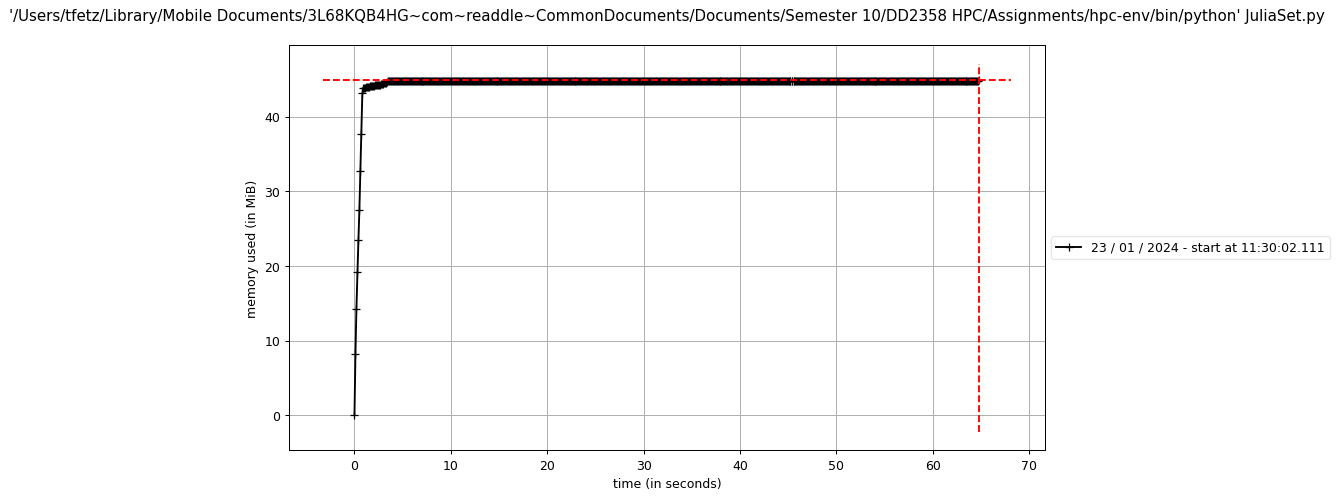

In [63]:
%run -m mprof run --output mprofile_julia.dat JuliaSet.py
%run -m mprof plot mprofile_julia.dat

# Task 2.1 Profile the diffusion process code
## cProfile

In [55]:
%run -i -m cProfile -o profile_diffusion.stats -s cumulative DiffusionProcess.py

### cProfile output visualized using snakeviz
python -m snakeviz profile_diffusion.stats --server
Note: The call graph was not very interesting in this case, shown below is the more detailed view by function

![Snakeviz cprofile](snakeviz_diffusion.png)

In [57]:
%run -i -m kernprof -l DiffusionProcess.py
%run -i -m line_profiler DiffusionProcess.py.lprof

Wrote profile results to DiffusionProcess.py.lprof
Inspect results with:
python -m line_profiler -rmt "DiffusionProcess.py.lprof"
Timer unit: 1e-06 s

Total time: 0.082064 s
File: DiffusionProcess.py
Function: evolve at line 5

Line #      Hits         Time  Per Hit   % Time  Line Contents
     5                                           @profile
     6                                           def evolve(grid, dt, D=1.0):
     7         5          9.0      1.8      0.0      xmax, ymax = grid_shape
     8       325       1379.0      4.2      1.7      new_grid = [[0.0] * ymax for x in range(xmax)]
     9       325        245.0      0.8      0.3      for i in range(xmax):
    10     20800      14077.0      0.7     17.2          for j in range(ymax):
    11     20480      10255.0      0.5     12.5              grid_xx = (
    12     20480      17026.0      0.8     20.7                  grid[(i + 1) % xmax][j] + grid[(i - 1) % xmax][j] - 2.0 * grid[i][j]
    13                             

## Task 2.2 Memory profile the diffusion code

In [58]:
%run -m memory_profiler DiffusionProcess.py

Filename: DiffusionProcess.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     5   52.617 MiB  263.051 MiB           5   @profile
     6                                         def evolve(grid, dt, D=1.0):
     7   52.617 MiB    0.000 MiB           5       xmax, ymax = grid_shape
     8   52.617 MiB    0.000 MiB         325       new_grid = [[0.0] * ymax for x in range(xmax)]
     9   52.633 MiB    0.000 MiB         325       for i in range(xmax):
    10   52.633 MiB    0.016 MiB       20800           for j in range(ymax):
    11   52.633 MiB    0.008 MiB       20480               grid_xx = (
    12   52.633 MiB    0.000 MiB       20480                   grid[(i + 1) % xmax][j] + grid[(i - 1) % xmax][j] - 2.0 * grid[i][j]
    13                                                     )
    14   52.633 MiB    0.008 MiB       20480               grid_yy = (
    15   52.633 MiB    0.000 MiB       20480                   grid[i][(j + 1) % ymax] + grid[i][(j - 1) % ymax] - 2.

mprof.py: Sampling memory every 0.1s
running new process
running as a Python program...
[98.1, 90.4, 98.0, 90.2, 98.0, 96.0, 100.0, 94.1]
[100.0, 98.0, 100.0, 98.1, 100.0, 98.0, 100.0, 94.1]
[100.0, 96.0, 100.0, 98.0, 100.0, 96.0, 98.1, 96.0]
[96.1, 86.0, 98.0, 86.0, 96.0, 88.2, 96.1, 90.2]
[98.1, 94.0, 100.0, 96.1, 100.0, 96.0, 100.0, 94.1]
[98.0, 88.0, 98.0, 90.2, 100.0, 90.0, 98.0, 92.2]
[94.1, 59.2, 92.0, 64.0, 92.2, 66.7, 92.0, 70.0]
[92.0, 61.2, 92.0, 62.7, 92.3, 64.7, 90.0, 65.3]
[98.0, 90.4, 98.0, 90.0, 98.0, 92.0, 100.0, 92.2]
[100.0, 92.0, 98.0, 96.1, 100.0, 96.0, 100.0, 98.0]
[100.0, 78.2, 100.0, 75.9, 100.0, 75.9, 100.0, 73.6]
[100.0, 80.4, 100.0, 75.5, 100.0, 74.5, 100.0, 68.0]
[100.0, 46.6, 100.0, 50.8, 100.0, 56.1, 100.0, 50.9]
[100.0, 76.5, 100.0, 72.5, 100.0, 76.5, 100.0, 76.5]
[100.0, 76.5, 100.0, 78.4, 100.0, 72.5, 100.0, 76.5]
[100.0, 74.0, 100.0, 76.0, 100.0, 76.0, 100.0, 80.4]
[100.0, 74.0, 100.0, 78.4, 100.0, 76.0, 100.0, 78.4]
[92.3, 58.0, 94.1, 58.0, 94.0, 58.0

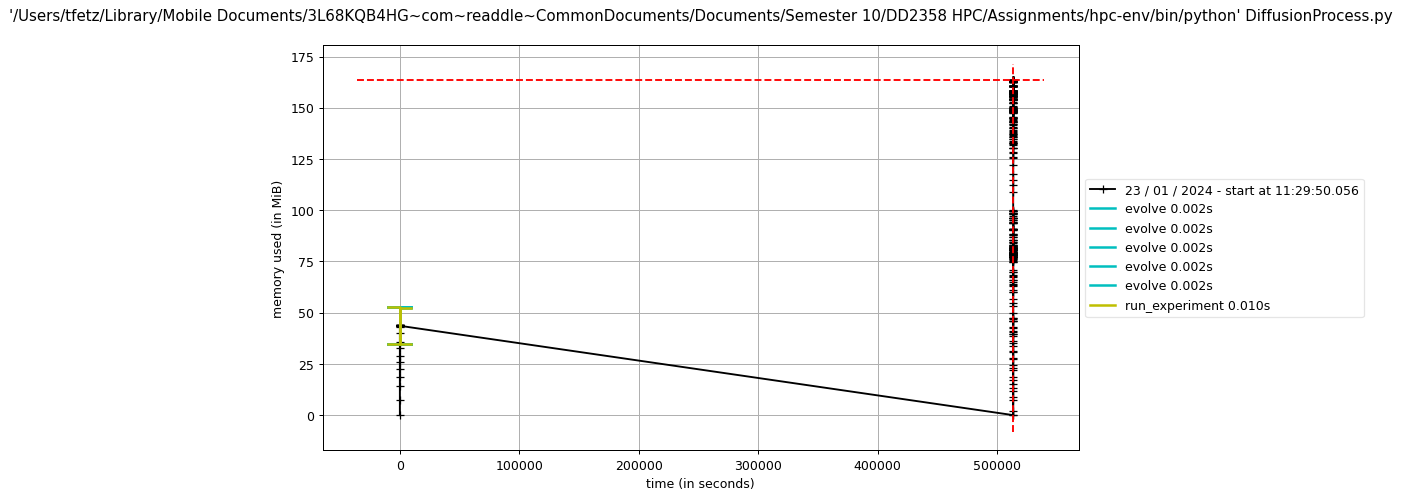

In [2]:
%run -m mprof run --output mprofile_diffusion.dat DiffusionProcess.py
%run -m mprof plot mprofile_diffusion.dat

## Bonus Exercise: Profiler Tool for Monitoring CPU Usage
We developed our profiler as Python class in [CPUMonitor.py](CPUMonitor.py). It records the CPU percentage of every core on a system either during a specified amount of time or as long as a program is running. The values are printed to the terminal, plotted and saved as .csv (see [julia_set.csv](julia_set.csv) and [diffusion_process.csv](diffusion_process.csv) with half-second intervals). 

Because a large number of processes are usually running simultaneously on our computers, the measurements are not very consistent between different runs. For long and CPU-intensive programs, it usually becomes possible to determine which cores they were run on, as these have load spikes for the duration of the program execution. Thereby one can deduce how parallelized the program currently is. 